Rbeast examples in more depth
https://pypi.org/project/Rbeast/

## Setup first

In [1]:
# Load in libraries needed to start
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import Rbeast as rb

In [2]:
os.getcwd()

'/Users/kaisataipale/Documents/fuel-and-food/2_code'

## Data

This data is from Barchart.com. No claim of accuracy is made, don't trade on this, etc

In [3]:
rbob = pd.read_csv('../1_data/RBY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
corn = pd.read_csv('../1_data/ZCY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
beanoil = pd.read_csv('../1_data/ZLY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
soy = pd.read_csv('../1_data/ZSY00_Barchart_Interactive_Chart_Monthly_Nearby_05_27_2024.csv', header = 1)
crude = pd.read_csv('../1_data/CLY00_Barchart_Interactive_Chart_Monthly_Nearby_06_02_2024.csv', header = 1)
ulsd = pd.read_csv('../1_data/HOY00_Barchart_Interactive_Chart_Monthly_Nearby_06_02_2024.csv', header = 1)

In [4]:
rbob.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1978-09-01,RBY00,0.4850,0.485,0.485,0.4850,0.0000,NaN,NaN
1,1978-10-01,RBY00,0.4720,0.490,0.472,0.4900,0.0050,NaN,NaN
2,1978-11-01,RBY00,0.4900,0.570,0.490,0.5500,0.0600,NaN,NaN
3,1978-12-01,RBY00,0.5500,0.550,0.530,0.5375,-0.0125,NaN,NaN
4,1979-01-01,RBY00,0.5325,0.570,0.525,0.5700,0.0325,NaN,NaN


In [5]:
corn.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
636,2024-02-01,ZCY00,438.25,438.25,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.00,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.00,416.50,444.625,17.625,434622.0,1536514.0
639,2024-05-01,ZCY00,449.50,481.50,449.50,472.750,28.125,399802.0,1495984.0
640,Downloaded from Barchart.com as of 05-27-2024 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that every file from Barchart has this line saying that it's downloaded from Barchart, which is 100% fair. To continue to transform the data in Python, we need to make a copy of the dataframe without this in the date column.

In [6]:
## Need to deal with datetimes, last line
commodities_dict = {'corn': corn,
                   'rbob': rbob, 
                   'soy': soy,
                   'crude': crude,
                   'beanoil': beanoil,
                   'soy': soy, 
                   'ulsd': ulsd}

In [7]:
for commodity in commodities_dict.keys():
    df = commodities_dict[commodity]
    df.drop(df.tail(1).index,inplace=True)

In [8]:
corn.tail()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
635,2024-01-01,ZCY00,466.25,470.375,431.25,439.250,-27.000,316074.0,1497444.0
636,2024-02-01,ZCY00,438.25,438.250,377.25,406.000,-33.250,457667.0,1584157.0
637,2024-03-01,ZCY00,403.25,427.000,403.25,427.000,21.000,312072.0,1550565.0
638,2024-04-01,ZCY00,425.50,447.000,416.50,444.625,17.625,434622.0,1536514.0
639,2024-05-01,ZCY00,449.50,481.500,449.50,472.750,28.125,399802.0,1495984.0


In [9]:
for commodity in commodities_dict.keys():
    df = commodities_dict[commodity]
    df['Date Time'] = pd.to_datetime(df['Date Time'])

In [10]:
corn_and_gas = corn.merge(rbob, on = 'Date Time', suffixes = ['_corn','_rbob'])
corn_and_crude = corn.merge(crude, on = 'Date Time', suffixes = ['_corn','_crude'])

In [11]:
corn_and_gas['scaled_corn'] = corn_and_gas['Close_corn']/(200)
corn_and_gas['scaled_gas'] = corn_and_gas['Close_rbob']

In [12]:
beanoil_and_ulsd = beanoil.merge(ulsd, on = 'Date Time', suffixes = ['_bo','_ulsd'])

In [13]:

help(rb.beast)

Help on function beast in module Rbeast.beast:

beast(Y, start=1, deltat=1, season='harmonic', period=nan, scp_minmax=[0, 10], sorder_minmax=[0, 5], sseg_minlength=None, sseg_leftmargin=None, sseg_rightmargin=None, tcp_minmax=[0, 10], torder_minmax=[0, 1], tseg_minlength=None, tseg_leftmargin=None, tseg_rightmargin=None, method='bayes', detrend=False, deseasonalize=False, mcmc_seed=0, mcmc_burbin=200, mcmc_chains=3, mcmc_thin=5, mcmc_samples=8000, ci=False, precValue=1.5, precPriorType='componentwise', print_options=True, print_progress=True, quiet=False, hasOutlier=False, ocp_max=10, gui=False, **kwargs)
          
    ################################################################################################
     Bayesian changepoint detection and time series decomposition for regular or irregular time series data
        
       The fitted model is:
             Y= trend + error             if data has no periodic/seasonal variation (i.e., season='none')
         Y= trend + sea


INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 100
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False | 

/opt/homebrew/Cellar/jupyterlab/4.0.2/libexec/lib/python3.11/site-packages/Rbeast/plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Object of 9 field(s):

 time        : [100 float32] 
 data        : [100 float32] 
 marg_lik    : -173.933 
 R2          : 0.447401 
 RMSE        : 125.423 
 sig2        : 16900.6 
 trend       : [ 1 object with 20 fields] 
               ncp            : 1.7865 
               ncp_median     : 2 
               ncp_mode       : 1 
               ncp_pct90      : 3 
               ncp_pct10      : 1 
               ncpPr          : [11 float32] 
               cpOccPr        : [100 float32] 
               order          : [100 float32] 
               cp             : [10 float32] 
               cpPr           : [10 float32] 
               cpAbruptChange : [10 float32] 
               cpCI           : [10x2 float32] 
               Y              : [100 float32] 
               SD             : [100 float32] 
               CI             : [100x2 float32] 
               slp            : [100 float32] 
               slpSD          : [100 float32] 
               slpCI          : [

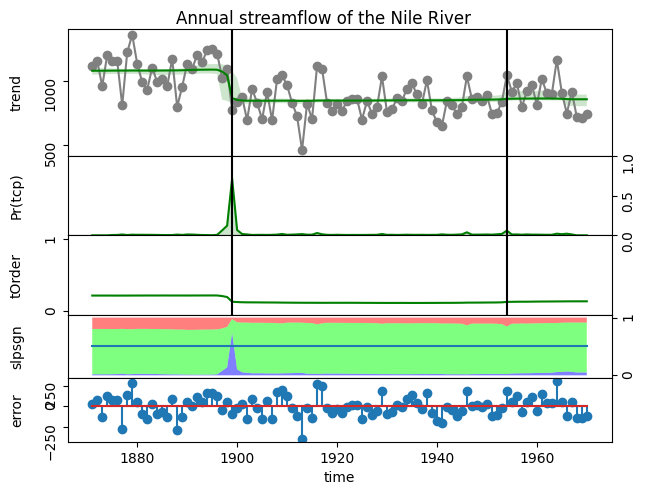

In [65]:
#nile, year = rb.load_example('nile')                     # nile is a 1d Python array or numpy vector


In [14]:
corn.head()

,Date Time,Symbol,Open,High,Low,Close,Change,Volume,Open Interest
0,1971-02-01,ZCY00,156.50,160.00,155.50,157.0,0.0,13646.0,72173.0
1,1971-03-01,ZCY00,156.50,158.00,152.00,152.0,-5.0,15845.0,61893.0
2,1971-04-01,ZCY00,152.75,155.00,146.25,149.0,-3.0,15265.0,53894.0
3,1971-05-01,ZCY00,149.75,155.00,148.50,155.0,6.0,17052.0,45821.0
4,1971-06-01,ZCY00,154.00,163.75,151.75,153.5,-1.5,28895.0,51193.0


INFO: '1971-02-01' interpreted as 1971-02-02 (Y-M-D)

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 640
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0833333 year = 1 months = 30.4167 days
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Erro

Object of 9 field(s):

 time        : [640 float32] 
 data        : [640 float32] 
 marg_lik    : -1156.3 
 R2          : 0.924195 
 RMSE        : 40.0914 
 sig2        : 1977.23 
 trend       : [ 1 object with 20 fields] 
               ncp            : 9.66633 
               ncp_median     : 10 
               ncp_mode       : 10 
               ncp_pct90      : 10 
               ncp_pct10      : 9 
               ncpPr          : [11 float32] 
               cpOccPr        : [640 float32] 
               order          : [640 float32] 
               cp             : [10 float32] 
               cpPr           : [10 float32] 
               cpAbruptChange : [10 float32] 
               cpCI           : [10x2 float32] 
               Y              : [640 float32] 
               SD             : [640 float32] 
               CI             : [640x2 float32] 
               slp            : [640 float32] 
               slpSD          : [640 float32] 
               slpCI          

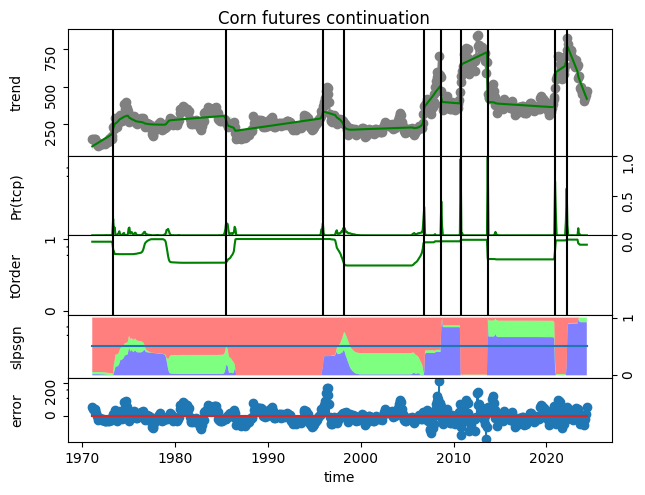

In [16]:
o          = rb.beast(corn['Close'], start='1971-02-01', deltat=1/12, season='none')  # season='none' bcz the data has no seasonal/periodic component
rb.plot(o, title='Corn futures continuation')
rb.print(o)

# Print a list of fields in the output variable (e.g, o.data, o.RMSE, o.trend.cp, o.time, and o.tend.cpOccPr)
# Check the R manual for expalanations of the output (https://cran.r-project.org/web/packages/Rbeast/Rbeast.pdf) 
o                                                        # this is equivalent to "print(o)"                                    

In [67]:
year

0     1871
1     1872
2     1873
3     1874
4     1875
      ... 
95    1966
96    1967
97    1968
98    1969
99    1970
Name: year, Length: 100, dtype: int64

In [17]:
corn_and_gas['corn_gas_spread'] = corn_and_gas['Close_rbob']-corn_and_gas['Close_corn']/(100*2.77)

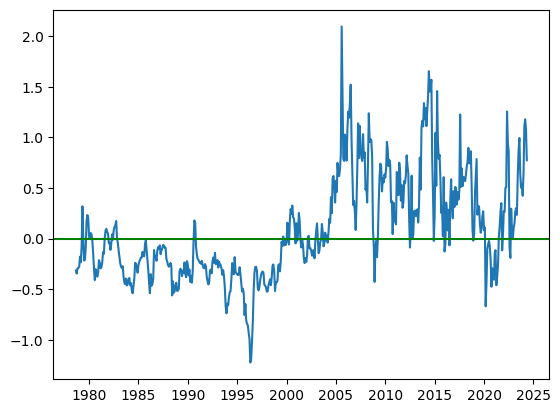

In [18]:
plt.plot(corn_and_gas['Date Time'], corn_and_gas['corn_gas_spread'])
plt.axhline(0, color = 'green')

In [19]:
corn_and_gas.head()

,Date Time,Symbol_corn,Open_corn,High_corn,Low_corn,Close_corn,Change_corn,Volume_corn,Open Interest_corn,Symbol_rbob,Open_rbob,High_rbob,Low_rbob,Close_rbob,Change_rbob,Volume_rbob,Open Interest_rbob,scaled_corn,scaled_gas,corn_gas_spread
0,1978-09-01,ZCY00,214.00,221.25,212.00,221.25,6.00,39771.0,114110.0,RBY00,0.4850,0.485,0.485,0.4850,0.0000,NaN,NaN,1.10625,0.4850,-0.313736
1,1978-10-01,ZCY00,224.50,234.25,219.50,231.25,10.00,49621.0,140100.0,RBY00,0.4720,0.490,0.472,0.4900,0.0050,NaN,NaN,1.15625,0.4900,-0.344838
2,1978-11-01,ZCY00,229.75,236.00,228.25,233.25,2.00,54467.0,147236.0,RBY00,0.4900,0.570,0.490,0.5500,0.0600,NaN,NaN,1.16625,0.5500,-0.292058
3,1978-12-01,ZCY00,234.00,234.00,227.00,228.75,-4.50,34309.0,130630.0,RBY00,0.5500,0.550,0.530,0.5375,-0.0125,NaN,NaN,1.14375,0.5375,-0.288312
4,1979-01-01,ZCY00,227.75,235.00,225.50,234.50,5.75,31265.0,127928.0,RBY00,0.5325,0.570,0.525,0.5700,0.0325,NaN,NaN,1.17250,0.5700,-0.276570


INFO: '1978-09-01' interpreted as 1978-09-09 (Y-M-D)

INFO: To supress printing the parameers in beast(),      set print.options = 0 
INFO: To supress printing the parameers in beast_irreg(),set print.options = 0 
INFO: To supress printing the parameers in beast123(),   set extra.printOptions = 0  
INFO: To supress warning messages in beast(),            set quiet = 1 
INFO: To supress warning messages in beast_irreg(),      set quiet = 1 
INFO: To supress warning messages in beast123(),         set extra.quiet = 1  

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 549
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  0.0833333 year = 1 months = 30.4167 days
HasSeasonCmpnt: True  | period = 1 year = 12 months = 365 days. The model 'Y=Trend+Season+Error' is fitted.
              : Num_of_DataPoints_per_P

|Progress:100.0% done[==============================================================]


(<Figure size 640x480 with 9 Axes>,
 array([<Axes: xlabel='[]', ylabel='Y'>,
        <Axes: xlabel='[]', ylabel='season'>,
        <Axes: xlabel='[]', ylabel='Pr(scp)'>,
        <Axes: xlabel='[]', ylabel='sOrder'>,
        <Axes: xlabel='[]', ylabel='trend'>,
        <Axes: xlabel='[]', ylabel='Pr(tcp)'>,
        <Axes: xlabel='[]', ylabel='tOrder'>,
        <Axes: xlabel='[]', ylabel='slpsgn'>,
        <Axes: xlabel='time', ylabel='error'>], dtype=object))

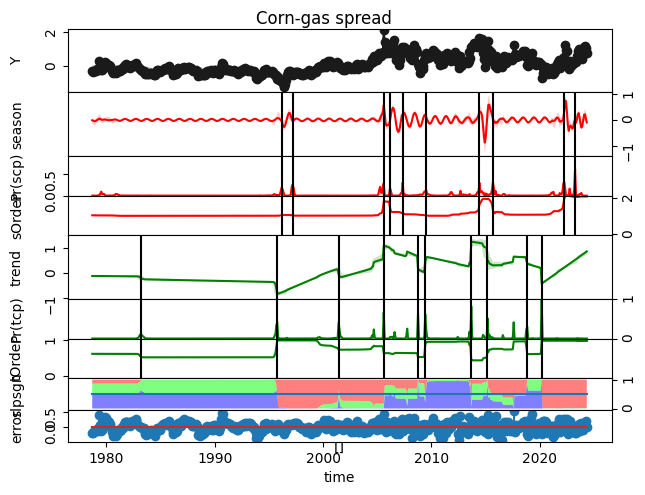

In [27]:
co_ga          = rb.beast(corn_and_gas['corn_gas_spread'], start='1978-09-01', deltat=1/12,period ='1.0 year')# season='none') 
rb.plot(co_ga, title='Corn-gas spread')


In [28]:
rb.print(co_ga)

#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.000|*                                               |
|Pr(ncp = 1 )=0.000|*                                               |
|Pr(ncp = 2 )=0.002|*                                               |
|Pr(ncp = 3 )=0.003|*                                               |
|Pr(ncp = 4 )=0.001|*                                               |
|Pr(ncp = 5 )=0.001|*                                               |
|Pr(ncp = 6 )=0.002|*                                               |
|Pr(ncp = 7 )=0.006|*                                               |
|Pr(ncp = 8 )=0.025|

In [164]:
# Make a dataframe of all the commodities, crue, rbob, corn, soy, beanoil
crbu = corn_and_gas.merge(beanoil_and_ulsd, on = 'Date Time')
crbu.head()

,Date Time,Symbol_corn,Open_corn,High_corn,Low_corn,Close_corn,Change_corn,Volume_corn,Open Interest_corn,Symbol_rbob,...,Volume_bo,Open Interest_bo,Symbol_ulsd,Open_ulsd,High_ulsd,Low_ulsd,Close_ulsd,Change_ulsd,Volume_ulsd,Open Interest_ulsd
0,1978-09-01,ZCY00,214.00,221.25,212.00,221.25,6.00,39771.0,114110.0,RBY00,...,20426.0,51302.0,HOY00,0.3975,0.3975,0.3975,0.3975,0.0315,NaN,NaN
1,1978-10-01,ZCY00,224.50,234.25,219.50,231.25,10.00,49621.0,140100.0,RBY00,...,25947.0,53980.0,HOY00,0.3975,0.4270,0.3550,0.4100,0.0125,NaN,NaN
2,1978-11-01,ZCY00,229.75,236.00,228.25,233.25,2.00,54467.0,147236.0,RBY00,...,25726.0,57406.0,HOY00,0.4100,0.4238,0.4100,0.4238,0.0138,NaN,5.0
3,1978-12-01,ZCY00,234.00,234.00,227.00,228.75,-4.50,34309.0,130630.0,RBY00,...,20170.0,53960.0,HOY00,0.4236,0.4275,0.4075,0.4100,-0.0138,3.0,31.0
4,1979-01-01,ZCY00,227.75,235.00,225.50,234.50,5.75,31265.0,127928.0,RBY00,...,19544.0,50025.0,HOY00,0.4100,0.4450,0.3620,0.4450,0.0350,16.0,174.0


In [174]:
close_cols = [ 'Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']

In [166]:
crbu = crbu[['Date Time', 'Close_corn', 'Close_rbob', 'Close_ulsd', 'Close_bo']]